In [178]:
import torch
from torch.utils.data import Dataset,DataLoader,RandomSampler,SequentialSampler,BatchSampler,default_collate
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [179]:
train_mnist=datasets.MNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor()
)

In [180]:
# test_mnist=datasets.MNIST(
#     root="data",
#     download=True,
#     train=False,
#     transform=ToTensor()
# )
# type(test_mnist)

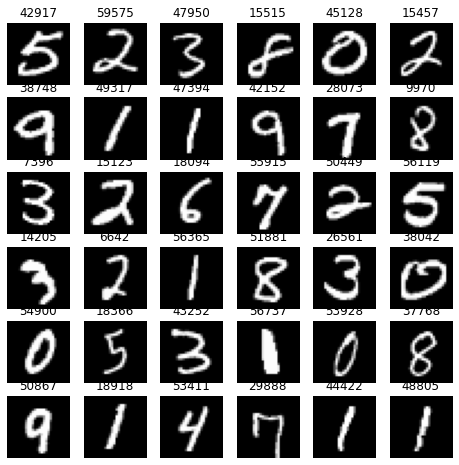

In [181]:

figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 6
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_mnist), size=(1,)).item()
    # plt.imshow(train_mnist[sample_idx])
    img, label = train_mnist[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(sample_idx)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

9
5


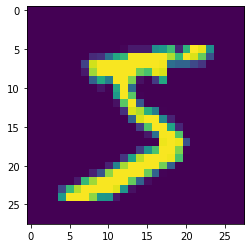

In [182]:
import idx2numpy as idx2np
import numpy as np

label_file='data/MNIST/raw/train-labels-idx1-ubyte'
labels=idx2np.convert_from_file(label_file)
print(labels[4])

img_file='data/MNIST/raw/train-images-idx3-ubyte'
img_array=idx2np.convert_from_file(img_file)

print(labels[0])
plt.imshow(img_array[0])

In [183]:
# class CustomDataset(Dataset):
#     def __init__(self,dataset):
#         self.dataset = dataset
#     def __len__(self):
#         return len(self.dataset)
#     def __getitem__(self,index):
#         image,label=self.dataset[index]
#         return image.squeeze(),label

In [184]:
class CustomDataset(Dataset):
    def __init__(self,images,labels):
        self.images=images
        self.labels=labels
    def __len__(self):
        return len(self.images)
    def __getitem__(self,index):
        image=self.images[index]
        label=self.labels[index]
        return image.squeeze(),label

5


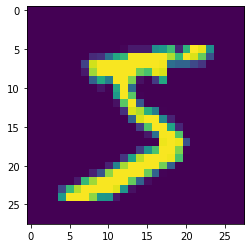

In [185]:
img_dataset=CustomDataset(img_array,labels)
# print(labels.shape)
x,y=img_dataset[0]
print(y)
plt.imshow(x)

4


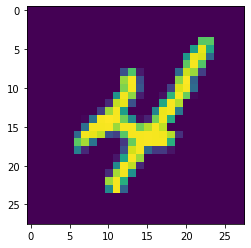

In [186]:
img,label=train_mnist[9]
print(label)
plt.imshow(img.squeeze())

tensor([2, 5, 2, 3, 5, 5, 6, 8, 5], dtype=torch.uint8)
tensor([1, 4, 9, 0, 0, 2, 5, 8, 6], dtype=torch.uint8)
tensor([6, 8, 6, 7, 1, 7, 1, 1, 4], dtype=torch.uint8)
tensor([8, 2, 8, 6, 3, 8, 8, 9, 0], dtype=torch.uint8)


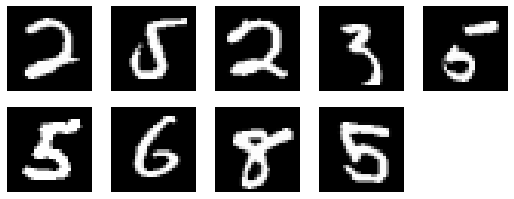

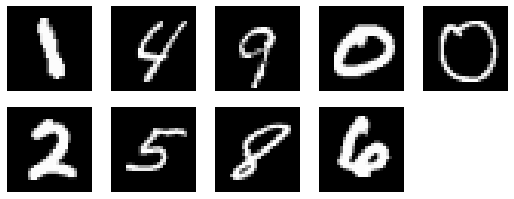

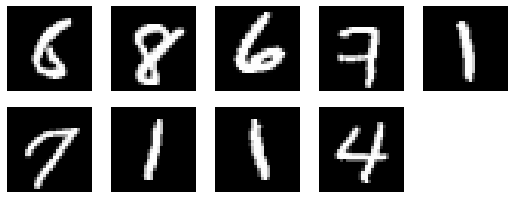

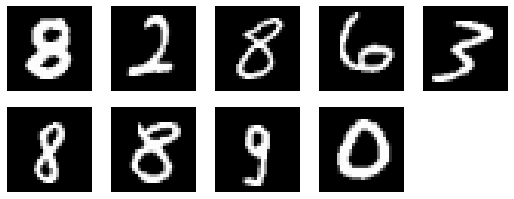

In [187]:

batch_size=9

rand_sampler=RandomSampler(img_dataset)
batch_sampler=BatchSampler(sampler=rand_sampler, batch_size=batch_size,drop_last=True)

dataloader=DataLoader(img_dataset,batch_sampler=batch_sampler)
count=0


for i in dataloader:
    fig=plt.figure(figsize=(9,9))
    print(i[1])
    # fig.add_subplot(3,3,1)
    for j in range(batch_size):
        fig.add_subplot(5,5,j+1)
        
        plt.imshow(i[0][j],cmap='gray')
        plt.axis("off")
        
    count+=1
    if(count==4):
        break

In [188]:
import os

data="aeroplane"
os.path.join("Data",data)


class CustomDataset(Dataset):
    def __init__(self,dir,class_name):
        self.dir=dir
        self.class_name=class_name
        self.root_path=os.path.join(self.dir,self.class_name)
        # print(self.root_path)
        self.elements=os.listdir(self.root_path)
        # print(self.elements)

    def __len__(self):
        return len(self.elements)
    def __getitem__(self,index):
        image=self.elements[index]
        # print(self.elements[index])
        img_path=os.path.join(self.root_path,image)
        img=plt.imread(img_path)
        return img



In [189]:
dir="Data/"
class_name="aeroplane"
custom_dataset=CustomDataset(dir,class_name)

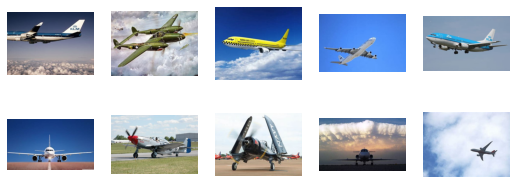

In [190]:

# print(dir,class_name)
len(custom_dataset)

fig=plt.figure(figsize=(9,9))

for i in range(len(custom_dataset)):
    img=custom_dataset[i]
    # plt.imshow(img,cmap="gray")
    # fig.add_subplot(3,3,1)
    fig.add_subplot(5,5,i+1)    
    plt.imshow(img,cmap='gray')
    plt.axis("off")

In [191]:
os.listdir("Data/person")

['image1.jpg',
 'image10.jpg',
 'image11.jpg',
 'image12.jpg',
 'image2.jpg',
 'image3.jpg',
 'image4.jpg',
 'image5.jpg',
 'image6.jpg',
 'image7.jpg',
 'image8.jpg',
 'image9.jpg']

In [192]:
# directory="MNIST_dataset"
# os.mkdir("MNIST_dataset/Train_MNIST")

Saving the MNIST dataset 

In [193]:
# ''' import cv2

# directory="MNIST_dataset"
# # Source_dir="data/MNIST/raw"
# # filename="train-images-idx3-ubyte"

# # label_file='data/MNIST/raw/train-labels-idx1-ubyte'
# # labels=idx2np.convert_from_file(label_file)


# img_file='data/MNIST/raw/t10k-images-idx3-ubyte'
# img_array=idx2np.convert_from_file(img_file)

# print(len(img_array))

# n=len(img_array)
# for i in range(n):
#     # filename="image{i}.jpg"
#     print(i)
#     cv2.imwrite(f"MNIST_dataset/Test_MNIST/image_{i}.jpg",img_array[i])

# # print(len(os.listdir("MNIST_dataset/Train_MNIST/")))
# # print(labels[0])
# plt.imshow(img_array[i]) '''

In [194]:

# for i in range(n):
#     sample_idx = torch.randint(len(train_mnist), size=(1,)).item()
#     # plt.imshow(train_mnist[sample_idx])
#     img, label = train_mnist[sample_idx]
#     figure.add_subplot(rows, cols, i)
#     plt.title(sample_idx)
#     plt.axis("off")
#     plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

In [195]:
# import os

# data="aeroplane"
# os.path.join("Data",data)


class CustomDataset(Dataset):
    def __init__(self, dir,class_name,label_path):
        self.dir=dir
        self.class_name=class_name
        self.root_path=os.path.join(self.dir,self.class_name)
        # print(self.root_path)
        self.elements=os.listdir(self.root_path)
        self.label_path=label_path
        self.label=pd.read_csv(self.label_path)
        print(label)
        # print(self.elements)

    def __len__(self):
        return len(self.elements)
    def __getitem__(self,index):
        image=self.elements[index]
        # print(self.elements[index])
        img_path=os.path.join(self.root_path,image)
        img=plt.imread(img_path)

        return img,self.label["0"][index]



In [196]:
dir="MNIST_dataset/"
class_name="Train_MNIST"

label_path="MNIST_dataset/labels_train.csv"
# label=pd.read_csv(label_path)
# print(label["0"][0])
custom_dataset=CustomDataset(dir,class_name,label_path)

4


In [197]:
batch_size=100



rand_sampler=RandomSampler(custom_dataset)
seq_sampler=SequentialSampler(custom_dataset)
batch_sampler=BatchSampler(sampler=rand_sampler, batch_size=batch_size, drop_last=True)


dataloader=DataLoader(custom_dataset,batch_sampler=batch_sampler)


len(dataloader)

600

tensor([4, 3, 8, 4, 2, 2, 4, 4, 7, 3, 4, 4, 3, 8, 5, 6, 8, 9, 0, 9, 3, 4, 8, 9,
        0, 6, 7, 3, 0, 8, 1, 7, 1, 4, 1, 7, 5, 3, 7, 9, 7, 5, 2, 5, 1, 1, 9, 3,
        9, 2, 3, 6, 5, 2, 0, 6, 2, 7, 3, 1, 4, 4, 4, 7, 0, 7, 7, 2, 7, 2, 2, 8,
        0, 8, 5, 4, 6, 4, 3, 0, 2, 2, 5, 4, 1, 5, 3, 4, 2, 4, 7, 8, 6, 3, 3, 6,
        1, 1, 3, 8])


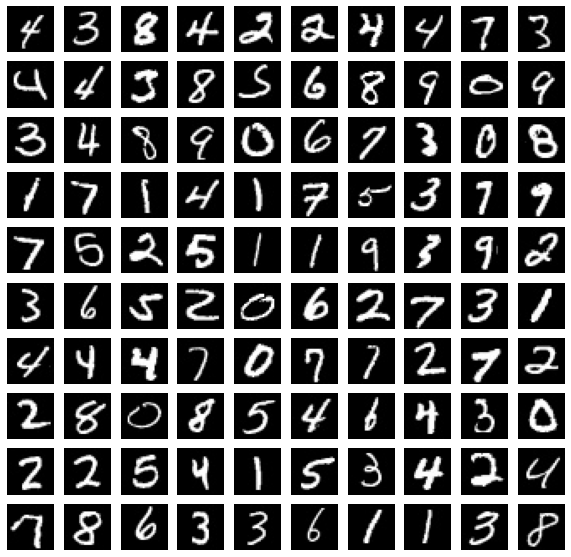

In [198]:

count=0


for i in dataloader:
    fig=plt.figure(figsize=(10,10))
    print(i[1])
    # fig.add_subplot(3,3,1)
    for j in range(batch_size):
        fig.add_subplot(10,10,j+1)
        # print(i[j].shape)
        plt.imshow(i[0][j],cmap='gray')
        plt.axis("off")
        
    count+=1
    if(count==1):
        break

In [199]:
# # default_collate([0,1,2,3,4,5,6,7,8,9])
# # default_collate([['0','1','2','3','4','5','6','7'],['a','b','c','d','e','f','g','h']]))
# img_id=os.listdir("MNIST_dataset/Train_MNIST/")

# default_collate([img_id,labels])

In [200]:

# batch=[{"0":"A","0":"A","00":"A","000":"A"},{"1":"B","10":"B","100":"B"},{"2":"C","20":"C","200":"C","2000":"c"}]
# elem=batch[0]
# list(zip(batch[0],batch[1],batch[2]))
# list(zip(batch[0],batch[1],batch[2]))

# # list(zip(torch.tensor(['0','1','2','3','4','5','6','7']),torch.tensor(['a','b','c','d','e','f','g','h'])))

# list(zip(labels,img_array))[0]




In [201]:

# l=list(zip(img_id[:100],labels[:100],img_id[:100]))
# dataloader=DataLoader(l,batch_size=4)
# for i in dataloader:
#     print(i)

In [202]:
class TempDataset(Dataset):
    def __init__(self):
        super(TempDataset, self).__init__()
        pass
    def __getitem__(self,index):
        # print("getitem is called",index)
        return index,index*10,index*100
    def __len__(self):
        len=50
        # print("len is called ",len)
        return len

In [203]:
dataset=TempDataset()
dataloader=DataLoader(dataset,batch_size=4)

for i in dataloader:
    print(i)

[tensor([0, 1, 2, 3]), tensor([ 0, 10, 20, 30]), tensor([  0, 100, 200, 300])]
[tensor([4, 5, 6, 7]), tensor([40, 50, 60, 70]), tensor([400, 500, 600, 700])]
[tensor([ 8,  9, 10, 11]), tensor([ 80,  90, 100, 110]), tensor([ 800,  900, 1000, 1100])]
[tensor([12, 13, 14, 15]), tensor([120, 130, 140, 150]), tensor([1200, 1300, 1400, 1500])]
[tensor([16, 17, 18, 19]), tensor([160, 170, 180, 190]), tensor([1600, 1700, 1800, 1900])]
[tensor([20, 21, 22, 23]), tensor([200, 210, 220, 230]), tensor([2000, 2100, 2200, 2300])]
[tensor([24, 25, 26, 27]), tensor([240, 250, 260, 270]), tensor([2400, 2500, 2600, 2700])]
[tensor([28, 29, 30, 31]), tensor([280, 290, 300, 310]), tensor([2800, 2900, 3000, 3100])]
[tensor([32, 33, 34, 35]), tensor([320, 330, 340, 350]), tensor([3200, 3300, 3400, 3500])]
[tensor([36, 37, 38, 39]), tensor([360, 370, 380, 390]), tensor([3600, 3700, 3800, 3900])]
[tensor([40, 41, 42, 43]), tensor([400, 410, 420, 430]), tensor([4000, 4100, 4200, 4300])]
[tensor([44, 45, 46, 47

In [204]:
def Own_collate_func(batch):
    collated_list=list(zip(*batch))
    # print(collated_list)
    return collated_list
dataloader=DataLoader(dataset,batch_size=3,collate_fn=Own_collate_func)

count=0
for i in dataloader:
    print(i)
    if(count==1):
        break

[(0, 1, 2), (0, 10, 20), (0, 100, 200)]
[(3, 4, 5), (30, 40, 50), (300, 400, 500)]
[(6, 7, 8), (60, 70, 80), (600, 700, 800)]
[(9, 10, 11), (90, 100, 110), (900, 1000, 1100)]
[(12, 13, 14), (120, 130, 140), (1200, 1300, 1400)]
[(15, 16, 17), (150, 160, 170), (1500, 1600, 1700)]
[(18, 19, 20), (180, 190, 200), (1800, 1900, 2000)]
[(21, 22, 23), (210, 220, 230), (2100, 2200, 2300)]
[(24, 25, 26), (240, 250, 260), (2400, 2500, 2600)]
[(27, 28, 29), (270, 280, 290), (2700, 2800, 2900)]
[(30, 31, 32), (300, 310, 320), (3000, 3100, 3200)]
[(33, 34, 35), (330, 340, 350), (3300, 3400, 3500)]
[(36, 37, 38), (360, 370, 380), (3600, 3700, 3800)]
[(39, 40, 41), (390, 400, 410), (3900, 4000, 4100)]
[(42, 43, 44), (420, 430, 440), (4200, 4300, 4400)]
[(45, 46, 47), (450, 460, 470), (4500, 4600, 4700)]
[(48, 49), (480, 490), (4800, 4900)]


In [205]:
dataloader=DataLoader(custom_dataset,batch_size=20,collate_fn=Own_collate_func)

3000


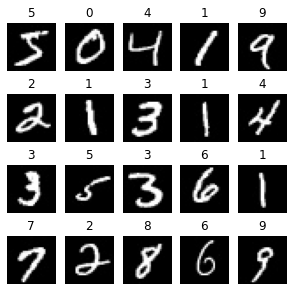

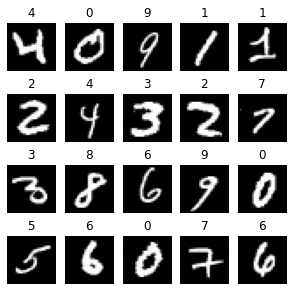

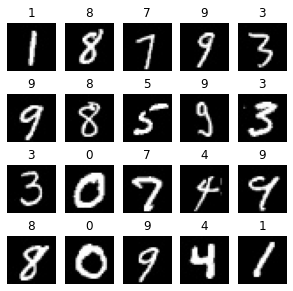

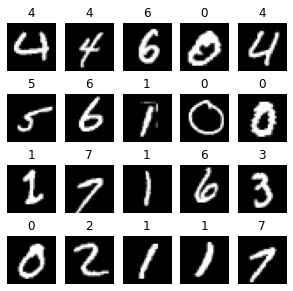

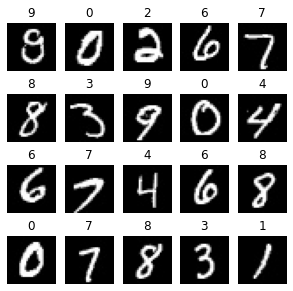

In [206]:

count=0
print(len(dataloader))

for i in dataloader:
    fig=plt.figure(figsize=(5,5))
    # print(i)
    # fig.add_subplot(3,3,1)
    for j in range(len(i[1])):
        fig.add_subplot(4,5,j+1)
        # print(i[j].shape)
        plt.title(i[1][j])
        plt.imshow(i[0][j],cmap='gray')
        plt.axis("off")
        
    count+=1
    if(count==5):
        break